In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pl
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

2024-05-15 23:18:56.036799: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 23:18:56.040067: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 23:18:56.084062: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 23:18:57.264793: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


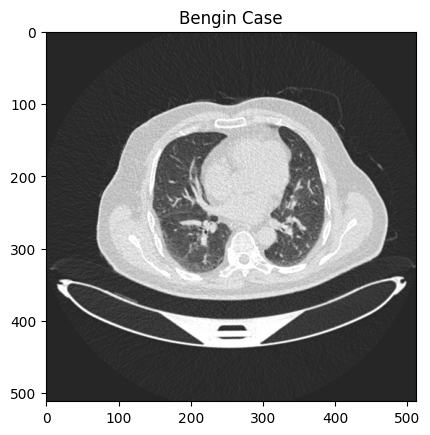

In [2]:
img = cv2.imread('/home/kaeya/Documents/datasets/lung cancer/Bengin cases/Bengin case (1).jpg')
plt.title('Bengin Case')
plt.imshow(img, label = 'Bengin Case')

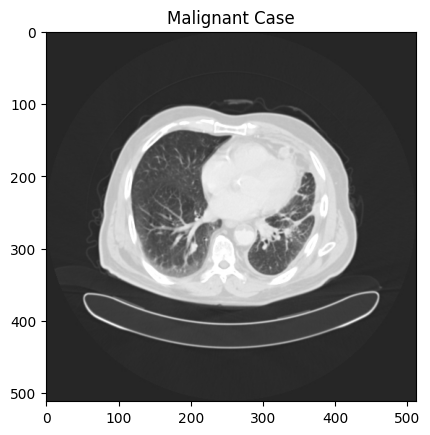

In [3]:
img = cv2.imread('/home/kaeya/Documents/datasets/lung cancer/Malignant cases/Malignant case (1).jpg')
plt.title('Malignant Case')
plt.imshow(img)

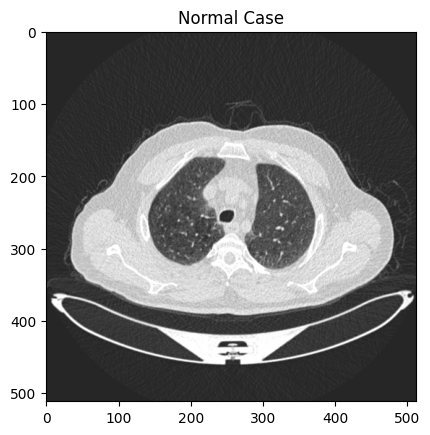

In [4]:
img = cv2.imread('/home/kaeya/Documents/datasets/lung cancer/Normal cases/Normal case (1).jpg')
plt.title('Normal Case')
plt.imshow(img)

In [5]:
img.shape

(512, 512, 3)

In [6]:
dir = '/home/kaeya/Documents/datasets/lung cancer/'
img_width = 256
img_height = 256

In [7]:
train_data = image_dataset_from_directory(dir,label_mode = "categorical", image_size = (img_height, img_width),batch_size = 16, shuffle = True,seed = 12, validation_split = 0.3, subset = "training")
test_data = image_dataset_from_directory(dir,label_mode = "categorical", image_size = (img_height, img_width),batch_size = 16, shuffle = True,seed = 12, validation_split = 0.2, subset = "validation")
val_data = image_dataset_from_directory(dir,label_mode = "categorical", image_size = (img_height, img_width),batch_size = 16, shuffle = True,seed = 12, validation_split = 0.1, subset = "validation")


Found 1097 files belonging to 3 classes.


Using 768 files for training.
Found 1097 files belonging to 3 classes.
Using 219 files for validation.
Found 1097 files belonging to 3 classes.
Using 109 files for validation.


2024-05-15 23:18:58.952531: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 23:18:58.953696: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model = Sequential()
model.add(Conv2D(128, (2, 2), padding = 'same', input_shape = (img_height, img_width, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(AvgPool2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(3000, activation = 'relu'))
model.add(Dense(1500, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

2024-05-15 23:18:59.401041: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 196608000 exceeds 10% of free system memory.
2024-05-15 23:18:59.487519: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 196608000 exceeds 10% of free system memory.
2024-05-15 23:18:59.517428: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 196608000 exceeds 10% of free system memory.


In [9]:
adam = Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 128)  │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 128, 128, 128)  │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │    49,155,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1500)           │     4,501,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,365,515 (207.39 MB)

 Trainable params: 54,364,619 (207.38 MB)

 Non-trainable params: 896 (3.50 KB)

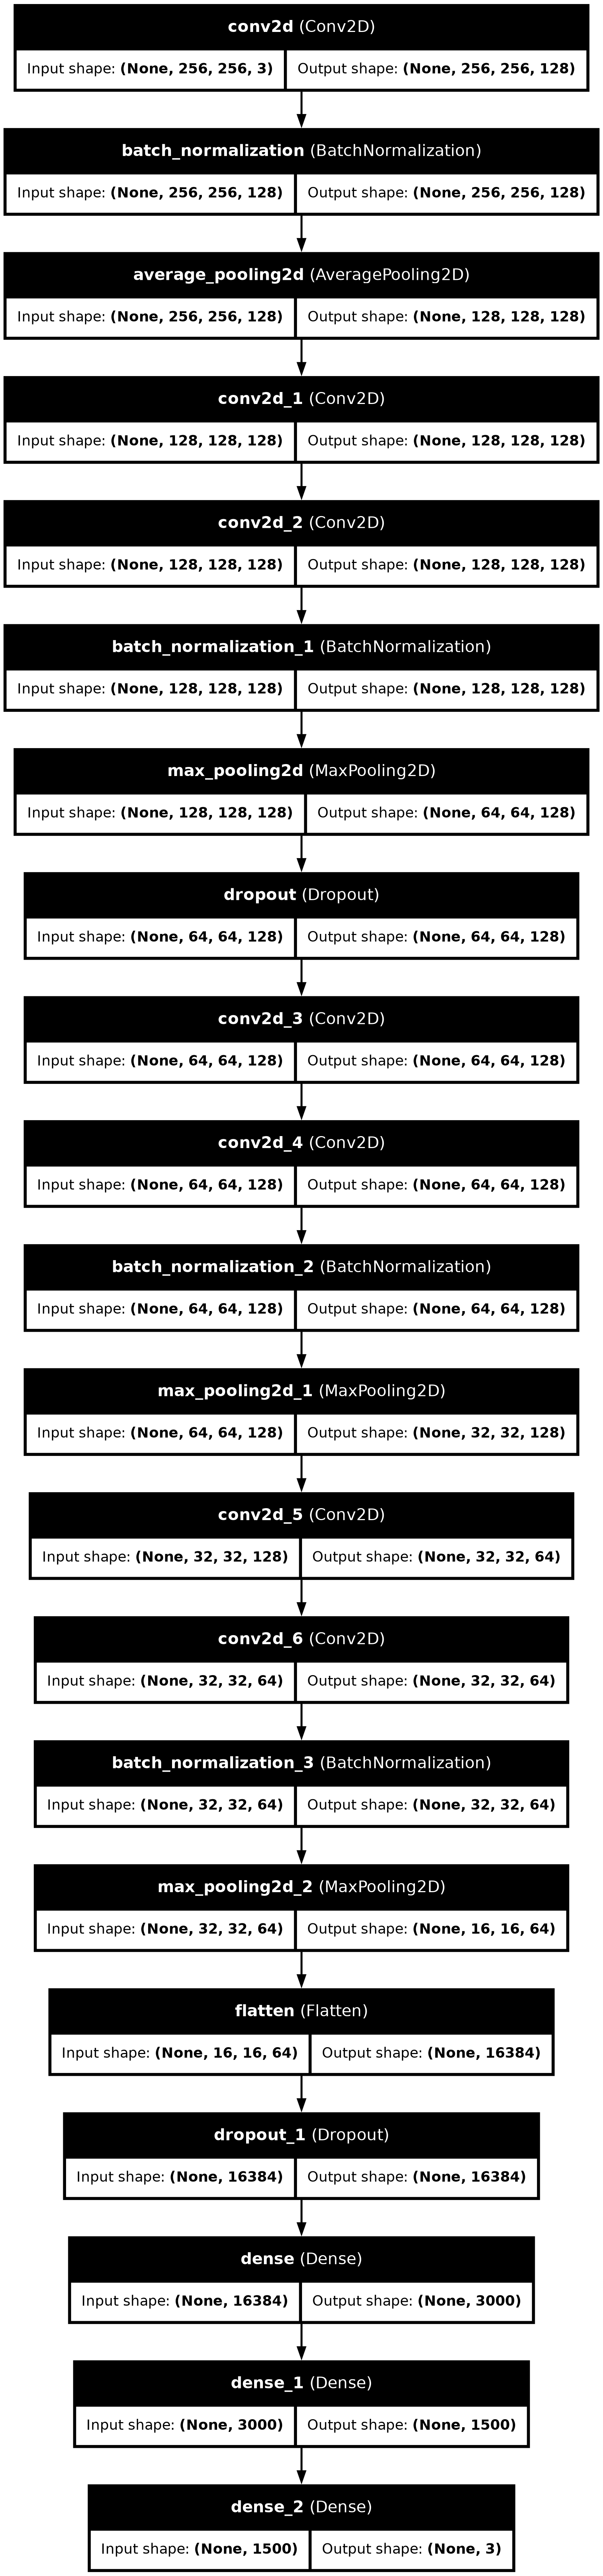

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 5, mode = 'max', verbose = 1)
path = '/home/kaeya/Documents/datasets/lung cancer/best.keras'
checkpoint = ModelCheckpoint(filepath = path, monitor = 'val_accuracy', mode = 'max', save_best_only = True, verbose = 1)
history = model.fit(train_data, validation_data = val_data, epochs = 100, callbacks = [early_stopping, checkpoint])

Epoch 1/100


2024-05-15 23:21:01.673239: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 196608000 exceeds 10% of free system memory.
2024-05-15 23:21:03.436035: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 536870912 exceeds 10% of free system memory.


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5768 - loss: 2.9984
Epoch 1: val_accuracy improved from -inf to 0.45872, saving model to /home/kaeya/Documents/datasets/lung cancer/best.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 382s 8s/step - accuracy: 0.5784 - loss: 2.9719 - val_accuracy: 0.4587 - val_loss: 1.1482
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9273 - loss: 0.2043
Epoch 2: val_accuracy improved from 0.45872 to 0.61468, saving model to /home/kaeya/Documents/datasets/lung cancer/best.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 366s 8s/step - accuracy: 0.9275 - loss: 0.2038 - val_accuracy: 0.6147 - val_loss: 0.8346
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9639 - loss: 0.0905
Epoch 3: val_accuracy improved from 0.61468 to 0.66972, saving model to /home/kaeya/Documents/datasets/lung cancer/best.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 361s 8s/step - accuracy: 0.9640 - loss: 0.0908 - val_accuracy: 0.6697 - val_loss: 0.7688
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━

In [12]:
best_model = load_model(path)

In [13]:
loss, acc = best_model.evaluate(test_data)

print(f'\nAccuracy = {acc}\nLoss = {loss}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9938 - loss: 0.0396

Accuracy = 0.9954338073730469
Loss = 0.030063560232520103


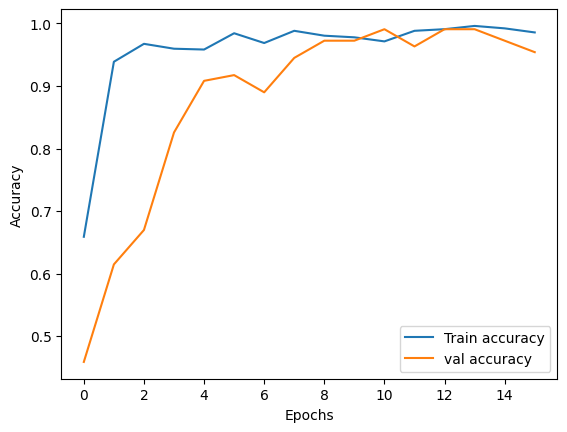

In [14]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

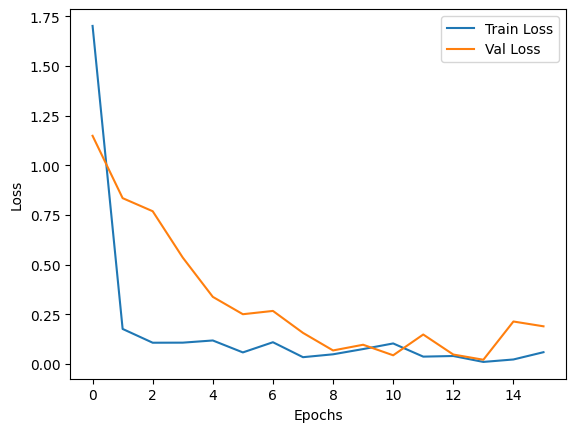

In [15]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')

In [18]:
best_model.save('/home/kaeya/Documents/machineLearning/lungs/lung cancer/saved_model.keras')

In [19]:
from tensorflow.keras.models import load_model
model.save('/home/kaeya/Documents/machineLearning/lungs/lung cancer/saved_model.h5')